## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [32]:
from google.colab import drive

In [33]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [34]:
project_path = "/content/drive/MyDrive/CNN_dogBreed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [35]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [36]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [37]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [38]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [39]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

In [40]:
labels = pd.read_csv('./labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [41]:
dog_breed_count = labels['breed'].value_counts()

dog_breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

### Get one-hot encodings of labels

In [42]:
import numpy as np


In [43]:

labels_encoded=labels

In [44]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(labels_encoded['breed'])
# Drop column breed as it is now encoded
labels_encoded = labels_encoded.drop('breed',axis = 1)
# Join the encoded df
labels_encoded = labels_encoded.join(one_hot)

In [45]:
labels_encoded.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000bec180eb18c7604dcecc8fe0dba07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001513dfcb2ffafc82cccf4d8bbaba97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001cdf01b096e06d78e9e5112d419397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00214f311d5d2247d5dfe4fe24b2303d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0021f9ceb3235effd7fcde7f7538ed62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [46]:
img_row=128
img_col=128
num_channel=1

In [47]:
from tqdm import tqdm
import cv2
x_train=[]
y_train=[]

for f,img in tqdm(labels.values):
  train_img=cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize=cv2.resize(train_img,(img_row,img_col))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:28<00:00, 358.82it/s]


'shetland_sheepdog'

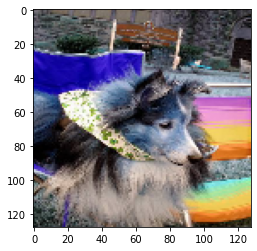

In [48]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10])
y_train[10]

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [49]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_train[10]

99

In [50]:
np.shape(x_train)
np.shape(y_train)
x_train = np.array(x_train).astype('float32')
n_x_train = x_train /255
np.shape(n_x_train)

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
new_x_train, x_val, new_y_train, y_val = train_test_split(n_x_train, y_train, test_size=0.2, random_state=1)
new_x_train.shape
x_val.shape

(2045, 128, 128, 3)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [53]:
sample_submission = pd.read_csv('sample_submission.csv')
test_img = sample_submission['id']


In [54]:
sample_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

Run the below code to load the test image files in x_test_feature

In [55]:
img_rows=128
img_cols=128
num_channel=1

In [56]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:15<00:00, 651.53it/s]


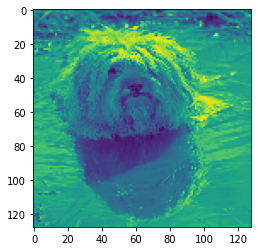

In [57]:
plt.imshow(x_test_feature[10])

Normalize the test data and convert it into 4 dimensions

In [58]:
import numpy as np
x_test_feature = np.array(x_test_feature).astype('float32')
x_test_feature /= 255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [59]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

In [60]:
model.add(tf.keras.layers.Conv2D(16,  
                                 kernel_size=(3,3), 
                                 activation='relu',input_shape=(128,128,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())



model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Flatten())

In [61]:
model.add(tf.keras.layers.Dense(256, activation='relu'))


model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [62]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0

### Use batch_size = 128 and epochs = 10 and execute the model

In [64]:
model.fit(new_x_train,new_y_train, validation_data=(x_val,y_val), epochs=10, batch_size=128)


Epoch 1/10
64/64 [==============================] - 11s 54ms/step - loss: 5.0359 - accuracy: 0.0085 - val_loss: 4.7710 - val_accuracy: 0.0117
Epoch 2/10
64/64 [==============================] - 3s 45ms/step - loss: 4.6838 - accuracy: 0.0225 - val_loss: 4.6573 - val_accuracy: 0.0200
Epoch 3/10
64/64 [==============================] - 3s 46ms/step - loss: 4.3976 - accuracy: 0.0538 - val_loss: 4.5767 - val_accuracy: 0.0284
Epoch 4/10
64/64 [==============================] - 3s 46ms/step - loss: 4.0430 - accuracy: 0.0960 - val_loss: 4.5068 - val_accuracy: 0.0391
Epoch 5/10
64/64 [==============================] - 3s 46ms/step - loss: 3.5222 - accuracy: 0.1886 - val_loss: 4.4319 - val_accuracy: 0.0553
Epoch 6/10
64/64 [==============================] - 3s 46ms/step - loss: 2.6909 - accuracy: 0.3491 - val_loss: 4.7422 - val_accuracy: 0.0465
Epoch 7/10
64/64 [==============================] - 3s 46ms/step - loss: 1.6892 - accuracy: 0.5799 - val_loss: 5.4079 - val_accuracy: 0.0582
Epoch 8/10
6

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [65]:
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2, shear_range=0.2,zoom_range=0.3,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

In [67]:
img_generator.fit(new_x_train)


In [69]:
model.fit_generator(img_generator.flow(new_x_train, new_y_train, batch_size=32),
                    steps_per_epoch=len(new_x_train)/32, epochs=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
255/255 [==============================] - 29s 112ms/step - loss: 4.7185 - accuracy: 0.0224
Epoch 2/10
255/255 [==============================] - 29s 113ms/step - loss: 4.5341 - accuracy: 0.0318
Epoch 3/10
255/255 [==============================] - 29s 112ms/step - loss: 4.4646 - accuracy: 0.0366
Epoch 4/10
255/255 [==============================] - 28s 110ms/step - loss: 4.3865 - accuracy: 0.0448
Epoch 5/10
255/255 [==============================] - 28s 111ms/step - loss: 4.3386 - accuracy: 0.0495
Epoch 6/10
255/255 [==============================] - 28s 111ms/step - loss: 4.2679 - accuracy: 0.0571
Epoch 7/10
255/255 [==============================] - 28s 111ms/step - loss: 4.2516 - accuracy: 0.0577
Epoch 8/10
255/255 [==============================] - 28s 110ms/step - loss: 4.1855 - accuracy: 0.0692
Epoch 9/10
255/255 [==============================] - 28s 110ms/step - loss: 4.1343 - accuracy: 0.0718
Epoch 10/10
255/255 [==============================] - 28s 111ms/step - l

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [70]:
train_generator = img_generator.flow(new_x_train, new_y_train, batch_size=32)
val_generator = img_generator.flow(x_val, y_val, batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [71]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Dogbreeds.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [72]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch= len(new_x_train)/32,  
                    validation_data=val_generator,
                    validation_steps = len(x_val)/32, 
                    callbacks = [model_checkpoint])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
255/255 [==============================] - 35s 138ms/step - loss: 4.0647 - accuracy: 0.0800 - val_loss: 4.1517 - val_accuracy: 0.0763
Epoch 2/10
255/255 [==============================] - 35s 136ms/step - loss: 4.0428 - accuracy: 0.0838 - val_loss: 4.2461 - val_accuracy: 0.0724
Epoch 3/10
255/255 [==============================] - 35s 136ms/step - loss: 4.0162 - accuracy: 0.0874 - val_loss: 4.1840 - val_accuracy: 0.0729
Epoch 4/10
255/255 [==============================] - 35s 137ms/step - loss: 3.9848 - accuracy: 0.0874 - val_loss: 4.1010 - val_accuracy: 0.0905
Epoch 5/10
255/255 [==============================] - 35s 137ms/step - loss: 3.9585 - accuracy: 0.0943 - val_loss: 4.1043 - val_accuracy: 0.0797
Epoch 6/10
255/255 [==============================] - 35s 137ms/step - loss: 3.9146 - accuracy: 0.1032 - val_loss: 4.1578 - val_accuracy: 0.0675
Epoch 7/10
255/255 [==============================] - 35s 136ms/step - loss: 3.8892 - accuracy: 0.1027 - val_loss: 4.1040 - val_ac

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [73]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= tf.keras.applications.vgg16.VGG16(weights=('/content/drive/My Drive/CNN_dogBreed/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg',input_shape=(128,128,3))

Print the summary of the base_model

In [74]:

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [75]:
tf.keras.backend.clear_session()
new_model=tf.keras.models.Sequential()

In [76]:
new_model.add(base_model)


In [77]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [78]:
new_model.add(tf.keras.layers.Flatten())
new_model.add(tf.keras.layers.Dense(1024, activation='relu'))
new_model.add(tf.keras.layers.Dropout(0.5))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Dense(256, activation='relu'))
new_model.add(tf.keras.layers.Dropout(0.5))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Dense(120, activation='softmax'))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [79]:
for layer in new_model.layers[:1]:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [80]:
new_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [81]:
new_model.fit(new_x_train,new_y_train,
            epochs=10,batch_size = 128,
            verbose=1,validation_data=(x_val,y_val))

Epoch 1/10
64/64 [==============================] - 20s 276ms/step - loss: 5.3014 - accuracy: 0.0096 - val_loss: 4.6435 - val_accuracy: 0.0455
Epoch 2/10
64/64 [==============================] - 13s 205ms/step - loss: 4.7839 - accuracy: 0.0339 - val_loss: 4.4570 - val_accuracy: 0.0709
Epoch 3/10
64/64 [==============================] - 13s 202ms/step - loss: 4.3800 - accuracy: 0.0669 - val_loss: 4.2686 - val_accuracy: 0.1159
Epoch 4/10
64/64 [==============================] - 13s 201ms/step - loss: 4.1028 - accuracy: 0.0940 - val_loss: 4.0864 - val_accuracy: 0.1154
Epoch 5/10
64/64 [==============================] - 13s 201ms/step - loss: 3.8818 - accuracy: 0.1207 - val_loss: 3.9003 - val_accuracy: 0.1355
Epoch 6/10
64/64 [==============================] - 13s 203ms/step - loss: 3.7382 - accuracy: 0.1326 - val_loss: 3.7573 - val_accuracy: 0.1457
Epoch 7/10
64/64 [==============================] - 13s 206ms/step - loss: 3.6568 - accuracy: 0.1477 - val_loss: 3.6341 - val_accuracy: 0.1614